In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import seaborn

from keras.callbacks import ModelCheckpoint
from keras.metrics import categorical_accuracy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers.convolutional import Convolution2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend
import tensorflow as tf

import pandas as pd
import numpy as np
import json

In [2]:
config = tf.ConfigProto()
sess = tf.Session(config=config) 
backend.set_session(sess)

In [3]:
class LeNet:
  @staticmethod
  def build(n_channels, 
            rows, 
            cols, 
            n_classes, 
            activation='relu', 
            weights_path=None):
    model = Sequential()
    
    input_Shape = (rows, cols, n_channels)
    
   
    #Convolution and Pooling Layers
    model.add(Conv2D(20, kernel_size=5, activation=activation, input_shape=input_Shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(50, kernel_size=5, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    #Flatten and Fully Conected layer
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation(activation))
    
    # OutputLayer SOFTMAX activation
    model.add(Dense(n_classes))
    model.add(Activation('softmax'))
    
    # if a weights path is supplied (inicating that the model was
    # pre-trained), then load the weights
    if weights_path is not None:
      model.load_weights(weights_path)
    
    return model

In [4]:
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [5]:
file_path='weights/victor_weights_Letras.h5'
with tf.Session() as sess:
    test_model = LeNet.build(n_channels=1, 
                             rows=28,
                             cols=28, 
                             n_classes=26, 
                             activation='relu', 
                             weights_path=file_path)

    pred = test_model.predict(x_test, verbose=1)
sess.close()

6279/6279 [==============================] - 1s 224us/step


In [10]:
precision, recall, f_betta, support = precision_recall_fscore_support(y_test.argmax(1), 
                                                                      pred.argmax(1),
                                                                      average='weighted')

accuracy = accuracy_score(y_test.argmax(1), pred.argmax(1))

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F Betta: {}'.format(f_betta))

Accuracy: 0.9764293677337156
Precision: 0.9768319608031975
Recall: 0.9764293677337156
F Betta: 0.9764248167938856


In [29]:
data = pd.DataFrame(confusion_matrix(y_test.argmax(1), pred.argmax(1)), 
                    index = [i for i in 'ABCDEFGHIJKLMNOPQRSTUVXYWZ'], 
                    columns = [i for i in 'ABCDEFGHIJKLMNOPQRSTUVXYWZ'])

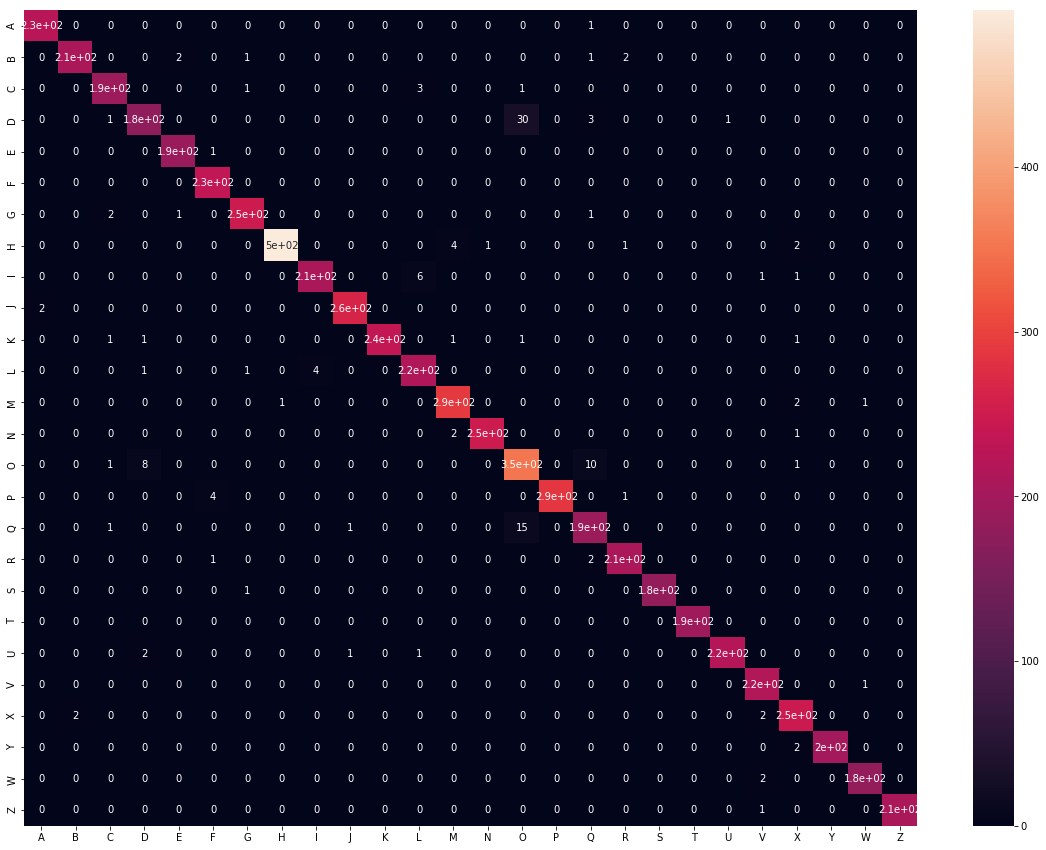

In [30]:
fig, ax = pyplot.subplots(figsize=(20, 15))
seaborn.heatmap(data, annot=True)